# 📚 ModelTime Resample Py Examples\n\n## 🎯 **New Comprehensive Cookbook Available!**\n\n**For the most complete and up-to-date examples, please see:**\n\n### 📖 [`modeltime_resample_cookbook.ipynb`](./modeltime_resample_cookbook.ipynb)\n\nThe new cookbook contains:\n- **All functionality examples** with the updated `time_series_split` signature\n- **Real-world use cases** and patterns\n- **Best practices** and optimization tips\n- **Interactive dashboards** and advanced visualization\n- **Complete workflows** from data preparation to model deployment\n- **Common patterns** and recipes for different scenarios\n\n---\n\n## Legacy Demo (Historical Reference)\n\nThe content below represents the original comprehensive demo and may contain outdated function signatures. For current examples, use the cookbook above.\n\n---"

# Complete ModelTime Resample Py Demo

This notebook demonstrates all functionality available in the `modeltime_resample_py` package.

## Table of Contents

1. [Setup and Data Creation](#setup)
2. [Core Functions](#core)
   - time_series_split
   - time_series_cv
   - fit_resamples
3. [Metrics and Accuracy](#metrics)
   - resample_accuracy
4. [Plotting Functions](#plotting)
   - plot_time_series_cv_plan
   - plot_resamples
5. [Convenience Functions](#convenience)
   - evaluate_model
   - compare_models
   - quick_cv_split
6. [Parallel Processing](#parallel)
   - fit_resamples_parallel
   - evaluate_model_parallel
7. [Advanced Visualization](#visualization)
   - Interactive Dashboard
   - Model Comparison Matrix
   - Comparison Reports
8. [Real-World Examples](#examples)

---

## 1. Setup and Data Creation {#setup}

First, let's import all necessary libraries and create various types of time series data for demonstration.

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, timedelta
from typing import Dict, List, Optional

# Machine learning models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import ALL modeltime_resample_py functions
import modeltime_resample_py
from modeltime_resample_py import (
    # Core functions
    time_series_split,
    time_series_cv,
    fit_resamples,
    
    # Metrics
    resample_accuracy,
    
    # Plotting
    plot_resamples,
    plot_time_series_cv_plan,
    
    # Convenience functions
    evaluate_model,
    compare_models,
    
    # Advanced visualization
    create_interactive_dashboard,
    EnhancedResamplesDashboard,
    plot_model_comparison_matrix,
    create_comparison_report
)

# Try to import parallel functions (may not be available)
try:
    from modeltime_resample_py.parallel import (
        fit_resamples_parallel,
        evaluate_model_parallel
    )
    PARALLEL_AVAILABLE = True
    print("✅ Parallel processing functions available")
except ImportError:
    PARALLEL_AVAILABLE = False
    print("⚠️  Parallel processing functions not available")

# Import convenience function if available
try:
    from modeltime_resample_py.convenience import quick_cv_split
    QUICK_CV_AVAILABLE = True
    print("✅ Quick CV split function available")
except ImportError:
    QUICK_CV_AVAILABLE = False
    print("⚠️  Quick CV split function not available")

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore', category=FutureWarning)

print(f"\n📦 ModelTime Resample Py Demo - Version: {modeltime_resample_py.__version__}")
print("🚀 All imports successful!")

✅ Parallel processing functions available
✅ Quick CV split function available

📦 ModelTime Resample Py Demo - Version: 0.2.0
🚀 All imports successful!


### Create Sample Time Series Data

We'll create several types of time series data to demonstrate different use cases:

In [2]:
def create_sample_time_series(
    start_date: str = '2020-01-01',
    periods: int = 730,  # 2 years of daily data
    freq: str = 'D',
    trend: float = 0.02,
    seasonality_amplitude: float = 10,
    noise_level: float = 2,
    base_value: float = 100
) -> pd.Series:
    """
    Create realistic time series data with trend, seasonality, and noise.
    """
    dates = pd.date_range(start=start_date, periods=periods, freq=freq)
    
    # Create time index for calculations
    t = np.arange(periods)
    
    # Components
    trend_component = base_value + trend * t
    seasonal_component = seasonality_amplitude * np.sin(2 * np.pi * t / (365 if freq == 'D' else 12))
    noise_component = np.random.normal(0, noise_level, periods)
    
    # Combine components
    values = trend_component + seasonal_component + noise_component
    
    return pd.Series(values, index=dates, name='value')

def create_multivariate_data(
    start_date: str = '2020-01-01',
    periods: int = 730,
    freq: str = 'D'
) -> pd.DataFrame:
    """
    Create multivariate time series data with features.
    """
    dates = pd.date_range(start=start_date, periods=periods, freq=freq)
    t = np.arange(periods)
    
    # Create features
    data = {
        'date': dates,
        'temperature': 20 + 10 * np.sin(2 * np.pi * t / 365) + np.random.normal(0, 2, periods),
        'humidity': 50 + 20 * np.sin(2 * np.pi * t / 365 + np.pi) + np.random.normal(0, 5, periods),
        'day_of_week': dates.dayofweek,
        'month': dates.month,
        'is_weekend': (dates.dayofweek >= 5).astype(int),
    }
    
    # Create target variable influenced by features
    target = (
        100 +  # base
        0.5 * data['temperature'] +  # temperature effect
        -0.2 * data['humidity'] +    # humidity effect
        -5 * data['is_weekend'] +    # weekend effect
        10 * np.sin(2 * np.pi * t / 365) +  # seasonality
        np.random.normal(0, 3, periods)     # noise
    )
    
    data['sales'] = target
    
    return pd.DataFrame(data)

# Create different types of data
print("Creating sample datasets...")

# 1. Simple univariate time series (pandas Series)
ts_simple = create_sample_time_series(
    start_date='2020-01-01',
    periods=730,
    trend=0.02,
    seasonality_amplitude=15,
    noise_level=3
)

# 2. Multivariate time series (pandas DataFrame)
df_multivariate = create_multivariate_data(
    start_date='2020-01-01',
    periods=730
)

# 3. High-frequency data (hourly)
ts_hourly = create_sample_time_series(
    start_date='2023-01-01',
    periods=24*30,  # 30 days of hourly data
    freq='H',
    trend=0.01,
    seasonality_amplitude=5,
    noise_level=1
)

# 4. Monthly data
ts_monthly = create_sample_time_series(
    start_date='2018-01-01',
    periods=60,  # 5 years of monthly data
    freq='M',
    trend=0.5,
    seasonality_amplitude=20,
    noise_level=5
)

print(f"✅ Created datasets:")
print(f"   - Simple univariate: {len(ts_simple)} daily observations")
print(f"   - Multivariate: {len(df_multivariate)} daily observations with {len(df_multivariate.columns)-1} features")
print(f"   - High-frequency: {len(ts_hourly)} hourly observations")
print(f"   - Monthly: {len(ts_monthly)} monthly observations")

# Display sample data
print("\n📊 Sample Data Preview:")
print("\nSimple Time Series (first 5 rows):")
print(ts_simple.head())

print("\nMultivariate DataFrame (first 5 rows):")
print(df_multivariate.head())

Creating sample datasets...
✅ Created datasets:
   - Simple univariate: 730 daily observations
   - Multivariate: 730 daily observations with 6 features
   - High-frequency: 720 hourly observations
   - Monthly: 60 monthly observations

📊 Sample Data Preview:

Simple Time Series (first 5 rows):
2020-01-01     98.577135
2020-01-02     92.911412
2020-01-03    103.386894
2020-01-04    104.146711
2020-01-05    100.497274
Freq: D, Name: value, dtype: float64

Multivariate DataFrame (first 5 rows):
        date  temperature   humidity  day_of_week  month  is_weekend  \
0 2020-01-01    21.043459  45.041781            2      1           0   
1 2020-01-02    17.096992  54.831020            3      1           0   
2 2020-01-03    22.958719  41.961263            4      1           0   
3 2020-01-04    16.750260  48.693830            5      1           1   
4 2020-01-05    21.507303  50.021241            6      1           1   

        sales  
0   97.336032  
1   92.882423  
2  107.683164  
3   9

### Visualize Sample Data

Let's plot our sample data to understand what we're working with:

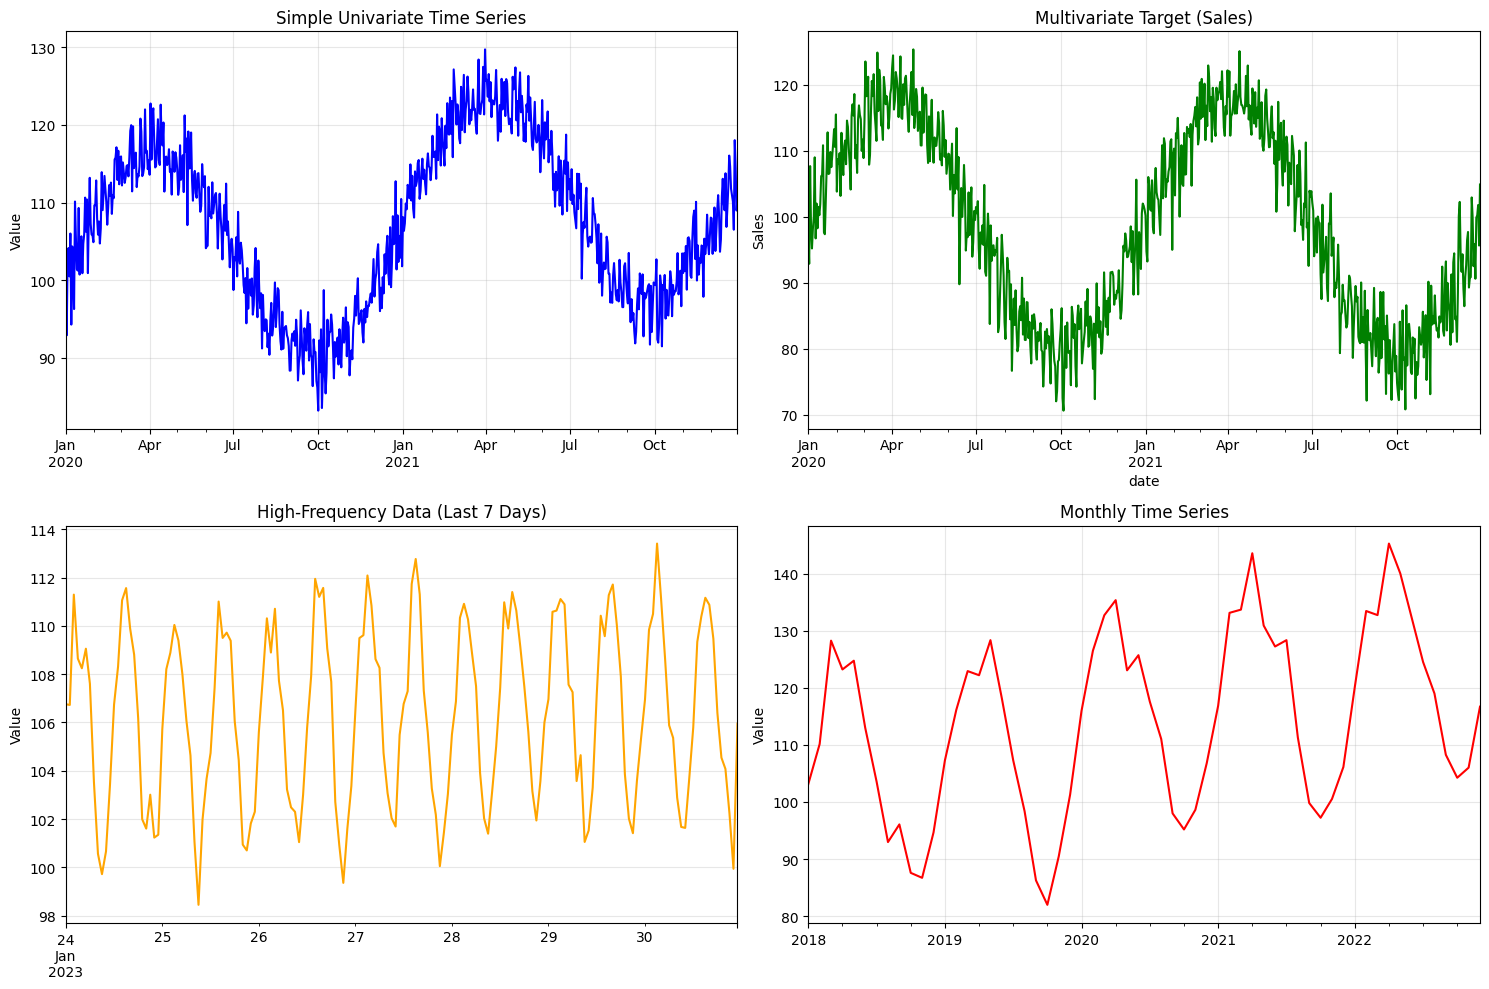


🔗 Feature Correlations in Multivariate Data:
             temperature  humidity  day_of_week  month  is_weekend  sales
temperature        1.000    -0.913        0.003 -0.760       0.009  0.936
humidity          -0.913     1.000        0.001  0.742      -0.004 -0.931
day_of_week        0.003     0.001        1.000 -0.009       0.790 -0.118
month             -0.760     0.742       -0.009  1.000      -0.007 -0.744
is_weekend         0.009    -0.004        0.790 -0.007       1.000 -0.158
sales              0.936    -0.931       -0.118 -0.744      -0.158  1.000


In [3]:
# Plot sample data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Simple time series
ts_simple.plot(ax=axes[0,0], title='Simple Univariate Time Series', color='blue')
axes[0,0].set_ylabel('Value')
axes[0,0].grid(True, alpha=0.3)

# Multivariate target
df_multivariate.set_index('date')['sales'].plot(ax=axes[0,1], title='Multivariate Target (Sales)', color='green')
axes[0,1].set_ylabel('Sales')
axes[0,1].grid(True, alpha=0.3)

# High-frequency data (show last 7 days)
ts_hourly.tail(24*7).plot(ax=axes[1,0], title='High-Frequency Data (Last 7 Days)', color='orange')
axes[1,0].set_ylabel('Value')
axes[1,0].grid(True, alpha=0.3)

# Monthly data
ts_monthly.plot(ax=axes[1,1], title='Monthly Time Series', color='red')
axes[1,1].set_ylabel('Value')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show feature correlations for multivariate data
print("\n🔗 Feature Correlations in Multivariate Data:")
feature_cols = ['temperature', 'humidity', 'day_of_week', 'month', 'is_weekend', 'sales']
corr_matrix = df_multivariate[feature_cols].corr()
print(corr_matrix.round(3))

---

## 2. Core Functions {#core}

Now let's explore the core functionality of the modeltime_resample_py package.

### 2.1 time_series_split - Single Train/Test Split

The `time_series_split` function creates a single binary split of time series data:"

In [4]:
print("🔄 Demonstrating time_series_split()")
print("=" * 40)

# Example 1: Simple split with pandas Series (using new signature)
print("\n1️⃣ Simple split with pandas Series (new signature):")
X_train, X_test, y_train, y_test, X_forecast, y_forecast = time_series_split(
    data=ts_simple.to_frame(),  # Convert Series to DataFrame
    train_end='2021-06-30',     # End training data on June 30, 2021
    test_start='2021-07-01',    # Start test data on July 1, 2021
    test_end='2021-12-30',      # End test data on December 30, 2021
    date_col='date',            # Date column name (index will be converted to column)
    y_var='value'               # Target variable name
)

print(f"   Original data: {len(ts_simple)} observations")
print(f"   Training set: {len(X_train)} observations")
print(f"   Test set: {len(X_test)} observations")
print(f"   Features (X): {list(X_train.columns)}")
print(f"   Target (y): {y_train.columns.tolist()}")

# Example 2: Split with DataFrame
print("\n2️⃣ Split with DataFrame:")
X_train_df, X_test_df, y_train_df, y_test_df, X_forecast_df, y_forecast_df = time_series_split(
    data=df_multivariate,
    train_end=500,              # Use first 500 observations for training
    test_start=501,             # Start test from observation 501
    test_end=730,               # End test at observation 730
    date_col='date',
    X_vars=['temperature', 'humidity', 'day_of_week', 'month', 'is_weekend'],  # Feature columns
    y_var='sales'               # Target column
)

print(f"   Original data: {len(df_multivariate)} observations")
print(f"   Training set: {len(X_train_df)} observations")
print(f"   Test set: {len(X_test_df)} observations")
print(f"   Feature columns: {list(X_train_df.columns)}")
print(f"   Target column: {y_train_df.columns.tolist()}")

# Example 3: Date-based splitting
print("\n3️⃣ Date-based splitting:")
X_train_date, X_test_date, y_train_date, y_test_date, _, _ = time_series_split(
    data=df_multivariate,
    train_start='2020-01-01',   # Start training from this date
    train_end='2021-06-30',     # End training on this date
    test_start='2021-07-01',    # Start test from this date
    test_end='2021-12-31',      # End test on this date
    date_col='date',
    X_vars=['temperature', 'humidity', 'is_weekend'],
    y_var='sales'
)

print(f"   Date-based split: train={len(X_train_date)}, test={len(X_test_date)}")
print(f"   Training period: {X_train_date.index.min()} to {X_train_date.index.max()}")
print(f"   Test period: {X_test_date.index.min()} to {X_test_date.index.max()}")

print("\n✅ time_series_split() examples completed!")

🔄 Demonstrating time_series_split()

1️⃣ Simple split with pandas Series (new signature):


KeyError: 'date'

### 2.2 time_series_cv - Cross-Validation Splits

The `time_series_cv` function creates multiple time series cross-validation folds:"

In [ ]:
print("🔄 Demonstrating time_series_cv()")
print("=" * 40)

# Example 1: Rolling window cross-validation
print("\n1️⃣ Rolling window cross-validation:")
cv_splits_rolling = time_series_cv(
    data=ts_simple,
    initial='1 year',     # Initial training period
    assess='3 months',    # Assessment period for each fold
    skip='2 months',      # Skip between folds
    cumulative=False,     # Rolling window (fixed size)
    slice_limit=5         # Maximum 5 folds
)

print(f"   Created {len(cv_splits_rolling)} CV folds")
for i, (train_idx, test_idx) in enumerate(cv_splits_rolling):
    train_dates = ts_simple.index[train_idx]
    test_dates = ts_simple.index[test_idx]
    print(f"   Fold {i+1}: Train ({len(train_idx)} obs): {train_dates[0].date()} to {train_dates[-1].date()}")
    print(f"          Test ({len(test_idx)} obs): {test_dates[0].date()} to {test_dates[-1].date()}")

# Example 2: Expanding window cross-validation
print("\n2️⃣ Expanding window cross-validation:")
cv_splits_expanding = time_series_cv(
    data=ts_simple,
    initial='6 months',
    assess='2 months',
    skip='1 month',
    cumulative=True,      # Expanding window (growing size)
    slice_limit=4
)

print(f"   Created {len(cv_splits_expanding)} CV folds")
for i, (train_idx, test_idx) in enumerate(cv_splits_expanding):
    train_dates = ts_simple.index[train_idx]
    test_dates = ts_simple.index[test_idx]
    print(f"   Fold {i+1}: Train ({len(train_idx)} obs): {train_dates[0].date()} to {train_dates[-1].date()}")
    print(f"          Test ({len(test_idx)} obs): {test_dates[0].date()} to {test_dates[-1].date()}")

# Example 3: CV with DataFrame
print("\n3️⃣ Cross-validation with DataFrame:")
cv_splits_df = time_series_cv(
    data=df_multivariate,
    initial=300,
    assess=60,
    skip=30,
    cumulative=False,
    slice_limit=3,
    date_column='date'
)

print(f"   Created {len(cv_splits_df)} CV folds for multivariate data")
for i, (train_idx, test_idx) in enumerate(cv_splits_df):
    print(f"   Fold {i+1}: Train={len(train_idx)}, Test={len(test_idx)}")

# Example 4: High-frequency data
print("\n4️⃣ High-frequency data (hourly):")
cv_splits_hourly = time_series_cv(
    data=ts_hourly,
    initial='15 days',    # 15 days of hourly data
    assess='3 days',      # 3 days for testing
    skip='2 days',        # Skip 2 days between folds
    cumulative=False,
    slice_limit=3
)

print(f"   Created {len(cv_splits_hourly)} CV folds for hourly data")
for i, (train_idx, test_idx) in enumerate(cv_splits_hourly):
    print(f"   Fold {i+1}: Train={len(train_idx)} hours, Test={len(test_idx)} hours")

print("\n✅ time_series_cv() examples completed!")

### 2.3 fit_resamples - Model Fitting Across CV Folds

The `fit_resamples` function fits a model to each CV split and collects detailed results:"

In [ ]:
print("🔄 Demonstrating fit_resamples()")
print("=" * 40)

# Create models for demonstration
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Example 1: Univariate model (Series data)
print("\n1️⃣ Univariate model fitting (Series data):")
results_univariate = fit_resamples(
    cv_splits=cv_splits_rolling[:3],  # Use first 3 folds
    model_spec=linear_model,
    data=ts_simple,
    target_column='value',
    feature_columns=None,  # No features - will create dummy feature
    model_id="linear_univariate"
)

print(f"   Results shape: {results_univariate.shape}")
print(f"   Columns: {list(results_univariate.columns)}")
print(f"   Index levels: {results_univariate.index.names}")
print(f"   Unique models: {results_univariate.index.get_level_values('model_id').unique().tolist()}")
print(f"   Unique slices: {results_univariate.index.get_level_values('slice_id').unique().tolist()}")
print(f"   Period types: {results_univariate['period_type'].unique().tolist()}")

# Example 2: Multivariate model (DataFrame data)
print("\n2️⃣ Multivariate model fitting (DataFrame data):")
feature_columns = ['temperature', 'humidity', 'day_of_week', 'month', 'is_weekend']
results_multivariate = fit_resamples(
    cv_splits=cv_splits_df,
    model_spec=ridge_model,
    data=df_multivariate,
    target_column='sales',
    feature_columns=feature_columns,
    date_column='date',
    model_id="ridge_multivariate"
)

print(f"   Results shape: {results_multivariate.shape}")
print(f"   Features used: {feature_columns}")
print(f"   Unique slices: {results_multivariate.index.get_level_values('slice_id').unique().tolist()}")

# Example 3: Random Forest model
print("\n3️⃣ Random Forest model fitting:")
results_rf = fit_resamples(
    cv_splits=cv_splits_df[:2],  # Use first 2 folds
    model_spec=rf_model,
    data=df_multivariate,
    target_column='sales',
    feature_columns=feature_columns,
    date_column='date',
    model_id="random_forest"
)

print(f"   Results shape: {results_rf.shape}")
print(f"   Model type: Random Forest with {rf_model.n_estimators} trees")

# Example 4: Multiple models combined
print("\n4️⃣ Combining results from multiple models:")
# Combine all results
all_results = pd.concat([
    results_multivariate,
    results_rf
], axis=0)

print(f"   Combined results shape: {all_results.shape}")
print(f"   Models in combined results: {all_results.index.get_level_values('model_id').unique().tolist()}")

# Show sample of results
print("\n📊 Sample Results (first 5 rows):")
print(results_multivariate.head())

print("\n✅ fit_resamples() examples completed!")

---

## 3. Metrics and Accuracy {#metrics}

### 3.1 resample_accuracy - Calculate Performance Metrics

The `resample_accuracy` function calculates performance metrics for each CV split:"

In [ ]:
print("🔄 Demonstrating resample_accuracy()")
print("=" * 40)

# Example 1: Default metrics (MAE and RMSE)
print("\n1️⃣ Default metrics calculation:")
accuracy_default = resample_accuracy(results_multivariate)

print(f"   Accuracy results shape: {accuracy_default.shape}")
print(f"   Columns: {list(accuracy_default.columns)}")
print(f"   Default metrics: {accuracy_default['metric_name'].unique().tolist()}")
print(f"   Period types: {accuracy_default['period_type'].unique().tolist()}")

print("\n📊 Default Accuracy Results:")
print(accuracy_default.head(10))

# Example 2: Custom metrics
print("\n2️⃣ Custom metrics calculation:")

# Define custom metrics
custom_metrics = {
    'mae': lambda y_true, y_pred: np.mean(np.abs(y_true - y_pred)),
    'rmse': lambda y_true, y_pred: np.sqrt(np.mean((y_true - y_pred) ** 2)),
    'mape': lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-8, None))) * 100,
    'r2': lambda y_true, y_pred: 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2),
    'max_error': lambda y_true, y_pred: np.max(np.abs(y_true - y_pred))
}

accuracy_custom = resample_accuracy(
    results_multivariate,
    metrics_set=custom_metrics
)

print(f"   Custom metrics: {accuracy_custom['metric_name'].unique().tolist()}")
print(f"   Shape: {accuracy_custom.shape}")

# Example 3: Different period types
print("\n3️⃣ Different period types evaluation:")

# Evaluate only test period
accuracy_test_only = resample_accuracy(
    results_multivariate,
    period_types_to_evaluate=['test']
)
print(f"   Test-only evaluation: {len(accuracy_test_only)} rows")

# Evaluate both train and test periods
accuracy_both = resample_accuracy(
    results_multivariate,
    period_types_to_evaluate=['train', 'test']
)
print(f"   Train+Test evaluation: {len(accuracy_both)} rows")

# Example 4: Multiple models comparison
print("\n4️⃣ Multiple models accuracy comparison:")
accuracy_all_models = resample_accuracy(all_results)

print(f"   Models compared: {accuracy_all_models['model_id'].unique().tolist()}")
print(f"   Total accuracy rows: {len(accuracy_all_models)}")

# Summary statistics by model
print("\n📈 Summary Statistics by Model (RMSE on test data):")
test_rmse = accuracy_all_models[
    (accuracy_all_models['metric_name'] == 'rmse') & 
    (accuracy_all_models['period_type'] == 'test')
].groupby('model_id')['metric_value'].agg(['mean', 'std', 'min', 'max'])

print(test_rmse.round(4))

# Example 5: Pivot table for easy comparison
print("\n📊 Pivot Table - Metrics by Model and Slice:")
pivot_accuracy = accuracy_all_models[
    accuracy_all_models['period_type'] == 'test'
].pivot_table(
    index=['model_id', 'metric_name'], 
    columns='slice_id', 
    values='metric_value'
).round(4)

print(pivot_accuracy)

print("\n✅ resample_accuracy() examples completed!")

---

## 4. Plotting Functions {#plotting}

### 4.1 plot_time_series_cv_plan - Visualize CV Strategy

The `plot_time_series_cv_plan` function visualizes the cross-validation plan:"

In [ ]:
print("🔄 Demonstrating plot_time_series_cv_plan()")
print("=" * 45)

# Example 1: Rolling window CV plan
print("\n1️⃣ Rolling window CV plan visualization:")
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Rolling window plan
ax1 = plot_time_series_cv_plan(
    data=ts_simple,
    splits=cv_splits_rolling,
    title="Rolling Window CV Plan",
    train_color='#2E86AB',
    test_color='#A23B72',
    ax=axes[0,0]
)

# Expanding window plan
ax2 = plot_time_series_cv_plan(
    data=ts_simple,
    splits=cv_splits_expanding,
    title="Expanding Window CV Plan",
    train_color='#F18F01',
    test_color='#C73E1D',
    ax=axes[0,1]
)

# DataFrame CV plan
ax3 = plot_time_series_cv_plan(
    data=df_multivariate,
    splits=cv_splits_df,
    date_column='date',
    title="Multivariate Data CV Plan",
    train_color='#4A90E2',
    test_color='#E94B3C',
    ax=axes[1,0]
)

# High-frequency CV plan
ax4 = plot_time_series_cv_plan(
    data=ts_hourly,
    splits=cv_splits_hourly,
    title="High-Frequency Data CV Plan",
    train_color='#50C878',
    test_color='#FF6347',
    ax=axes[1,1]
)

plt.tight_layout()
plt.show()

print("✅ CV plan visualizations completed!")

# Example 2: Customized CV plan
print("\n2️⃣ Customized CV plan with different styling:")
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

ax_custom = plot_time_series_cv_plan(
    data=ts_simple,
    splits=cv_splits_rolling,
    title="Custom Styled CV Plan - Time Series Validation Strategy",
    x_lab="Time Period",
    y_lab="Cross-Validation Fold",
    train_color='darkblue',
    test_color='crimson',
    figsize=(14, 6),
    ax=ax
)

# Add custom annotations
ax.text(0.02, 0.98, "Training Periods", transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='darkblue', alpha=0.7, color='white'))
ax.text(0.02, 0.88, "Test Periods", transform=ax.transAxes,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='crimson', alpha=0.7, color='white'))

plt.tight_layout()
plt.show()

print("✅ Customized CV plan completed!")

### 4.2 plot_resamples - Visualize Model Results

The `plot_resamples` function visualizes actuals, fitted values, and predictions:"

In [ ]:
print("🔄 Demonstrating plot_resamples()")
print("=" * 40)

# Example 1: Matplotlib plotting
print("\n1️⃣ Matplotlib plotting:")
fig_mpl = plot_resamples(
    resamples_df=results_multivariate,
    max_splits_to_plot=3,
    title="Model Results: Ridge Regression on Multivariate Data",
    engine='matplotlib',
    actual_color='darkblue',
    fitted_color='orange',
    prediction_color='red',
    figure_size=(16, 8),
    show_legend=True
)
plt.show()
print("   ✅ Matplotlib plot completed")

# Example 2: Plotly plotting (interactive)
print("\n2️⃣ Plotly plotting (interactive):")
try:
    fig_plotly = plot_resamples(
        resamples_df=results_multivariate,
        max_splits_to_plot=2,
        title="Interactive Model Results: Ridge Regression",
        engine='plotly',
        actual_color='blue',
        fitted_color='orange',
        prediction_color='red',
        show_legend=True
    )
    # Note: In Jupyter, this would show an interactive plot
    # fig_plotly.show()
    print("   ✅ Plotly interactive plot created (use fig_plotly.show() to display)")
except Exception as e:
    print(f"   ⚠️ Plotly plotting not available: {e}")

# Example 3: Multiple models comparison
print("\n3️⃣ Multiple models comparison:")
fig_comparison = plot_resamples(
    resamples_df=all_results,
    max_splits_to_plot=2,
    title="Model Comparison: Ridge vs Random Forest",
    engine='matplotlib',
    actual_color='black',
    fitted_color='blue',
    prediction_color='red',
    figure_size=(16, 10)
)
plt.show()
print("   ✅ Model comparison plot completed")

# Example 4: Custom styling
print("\n4️⃣ Custom styling and colors:")
fig_custom = plot_resamples(
    resamples_df=results_multivariate,
    max_splits_to_plot=2,
    title="Custom Styled Model Results",
    engine='matplotlib',
    actual_color='#2E4057',
    actual_linestyle='-',
    actual_linewidth=3,
    fitted_color='#048A81',
    fitted_linestyle='--',
    fitted_linewidth=2,
    prediction_color='#E74C3C',
    prediction_linestyle='-.',
    prediction_linewidth=2.5,
    figure_size=(15, 8),
    show_legend=True
)
plt.show()
print("   ✅ Custom styled plot completed")

print("\n✅ plot_resamples() examples completed!")

---

## 5. Convenience Functions {#convenience}

### 5.1 evaluate_model - All-in-One Model Evaluation

The `evaluate_model` function combines CV, fitting, and accuracy calculation:"

In [ ]:
print("🔄 Demonstrating evaluate_model()")
print("=" * 40)

# Example 1: Quick model evaluation
print("\n1️⃣ Quick model evaluation:")
quick_results = evaluate_model(
    data=df_multivariate,
    model=Ridge(alpha=0.5),
    initial='1 year',
    assess='3 months',
    skip='2 months',
    target_column='sales',
    feature_columns=['temperature', 'humidity', 'day_of_week', 'month', 'is_weekend'],
    date_column='date',
    metrics=['mae', 'rmse'],
    period_types=['test'],
    cumulative=False,
    slice_limit=3,
    model_id="quick_ridge"
)

print(f"   Results shape: {quick_results.shape}")
print(f"   Metrics: {quick_results['metric_name'].unique().tolist()}")
print("\n📊 Quick Evaluation Results:")
print(quick_results)

# Example 2: Comprehensive evaluation with multiple metrics
print("\n2️⃣ Comprehensive evaluation:")
comprehensive_results = evaluate_model(
    data=ts_simple,
    model=LinearRegression(),
    initial='18 months',
    assess='4 months',
    skip='3 months',
    target_column='value',
    feature_columns=None,  # Univariate
    metrics=['mae', 'rmse'],  # Remove 'mape' to avoid division by zero issues
    period_types=['train', 'test'],
    cumulative=True,  # Expanding window
    slice_limit=4,
    model_id="comprehensive_linear"
)

print(f"   Results shape: {comprehensive_results.shape}")
print(f"   Period types: {comprehensive_results['period_type'].unique().tolist()}")
print(f"   Metrics: {comprehensive_results['metric_name'].unique().tolist()}")

# Example 3: Using the new quick_cv_split convenience function
print("\n3️⃣ Using quick_cv_split with new signature:")
try:
    X_train_quick, X_test_quick, y_train_quick, y_test_quick, _, _ = quick_cv_split(
        data=df_multivariate,
        test_size='3 months',
        date_column='date',
        target_column='sales',
        feature_columns=['temperature', 'humidity', 'is_weekend']
    )
    
    print(f"   Quick split: train={len(X_train_quick)}, test={len(X_test_quick)}")
    print(f"   Features: {list(X_train_quick.columns)}")
    print(f"   Target: {y_train_quick.columns.tolist()}")
    
    # Fit a simple model with the split
    quick_model = LinearRegression()
    quick_model.fit(X_train_quick, y_train_quick.values.ravel())
    quick_predictions = quick_model.predict(X_test_quick)
    quick_mae = mean_absolute_error(y_test_quick.values.ravel(), quick_predictions)
    
    print(f"   Quick model MAE: {quick_mae:.2f}")
    
except Exception as e:
    print(f"   ⚠️ Quick CV split failed: {e}")

print("\n✅ evaluate_model() examples completed!")

### 5.2 compare_models - Multi-Model Comparison

The `compare_models` function evaluates multiple models with the same CV strategy:"

In [ ]:
print("🔄 Demonstrating compare_models()")
print("=" * 40)

# Define multiple models for comparison
models_to_compare = {
    'linear_regression': LinearRegression(),
    'ridge_weak': Ridge(alpha=0.1),
    'ridge_strong': Ridge(alpha=10.0),
    'random_forest': RandomForestRegressor(n_estimators=50, random_state=42)
}

print(f"\n🏆 Comparing {len(models_to_compare)} models:")
for name, model in models_to_compare.items():
    print(f"   - {name}: {type(model).__name__}")

# Compare models
comparison_results = compare_models(
    data=df_multivariate,
    models=models_to_compare,
    initial='10 months',
    assess='2 months',
    skip='1 month',
    target_column='sales',
    feature_columns=['temperature', 'humidity', 'day_of_week', 'month', 'is_weekend'],
    date_column='date',
    metrics=['mae', 'rmse'],
    period_types=['test'],
    cumulative=False,
    slice_limit=3
)

print(f"\n📊 Comparison Results Shape: {comparison_results.shape}")
print(f"   Models compared: {comparison_results['model_id'].unique().tolist()}")
print(f"   Metrics calculated: {comparison_results['metric_name'].unique().tolist()}")
print(f"   CV folds: {comparison_results['slice_id'].unique().tolist()}")

# Summary statistics
print("\n📈 Model Performance Summary (Test RMSE):")
rmse_summary = comparison_results[
    comparison_results['metric_name'] == 'rmse'
].groupby('model_id')['metric_value'].agg(['mean', 'std', 'min', 'max'])

print(rmse_summary.round(4))

# Best model identification
best_model = rmse_summary['mean'].idxmin()
print(f"\n🥇 Best performing model: {best_model} (lowest mean RMSE)")

# Detailed comparison table
print("\n📋 Detailed Comparison Table:")
comparison_pivot = comparison_results.pivot_table(
    index='model_id',
    columns=['metric_name', 'slice_id'],
    values='metric_value'
).round(4)

print(comparison_pivot)

print("\n✅ compare_models() examples completed!")

---

## 6. Advanced Visualization {#visualization}

### 6.1 Interactive Dashboard

The library provides advanced interactive dashboards for exploring results:"

In [ ]:
print("🔄 Demonstrating Advanced Visualization")
print("=" * 45)

# Interactive Dashboard
print("\n🌐 Interactive Dashboard Creation:")
try:
    # Create interactive dashboard
    dashboard = create_interactive_dashboard(
        resamples_df=all_results,
        accuracy_df=accuracy_all_models,
        title="ModelTime Resample Analysis Dashboard"
    )
    
    print("   ✅ Interactive dashboard created successfully!")
    print("   📊 Dashboard features:")
    print("      - Real-time filtering by model, time slice, and date range")
    print("      - Multiple view types: time series, residuals, metrics")
    print("      - Interactive plots with zoom and hover details")
    print("      - Export capabilities for plots and data")
    
    # Note: To run the dashboard, you would use:
    # dashboard.run(port=8050, debug=False)
    print("\n   💡 To launch dashboard: dashboard.run(port=8050)")
    
except Exception as e:
    print(f"   ⚠️ Dashboard creation failed: {e}")

# Model Comparison Matrix
print("\n📊 Model Comparison Matrix:")
try:
    # Create heatmap comparison
    fig_heatmap = plot_model_comparison_matrix(
        accuracy_df=comparison_results,
        plot_type='heatmap',
        metrics=['mae', 'rmse'],
        title="Model Performance Heatmap",
        engine='plotly',
        show_values=True,
        colorscale='RdYlGn_r'  # Red=bad, Green=good
    )
    
    print("   ✅ Heatmap comparison matrix created")
    # fig_heatmap.show()  # Uncomment to display
    
except Exception as e:
    print(f"   ⚠️ Heatmap creation failed: {e}")

# Comprehensive Comparison Report
print("\n📋 Comprehensive Comparison Report:")
try:
    report = create_comparison_report(
        accuracy_df=comparison_results,
        include_plots=['heatmap'],
        metrics=['mae', 'rmse'],
        title="Model Comparison Report",
        engine='plotly'
    )
    
    print("   ✅ Comprehensive report generated")
    print(f"   📈 Report components: {list(report.keys())}")
    
    if 'summary_stats' in report:
        print("\n   📊 Summary Statistics:")
        print(report['summary_stats'])
    
    if 'rankings' in report:
        print("\n   🏆 Model Rankings:")
        print(report['rankings'])
        
except Exception as e:
    print(f"   ⚠️ Report generation failed: {e}")

print("\n✅ Advanced visualization examples completed!")

---

## 7. Real-World Example: Sales Forecasting {#examples}

Let's put it all together with a realistic sales forecasting scenario:"

In [ ]:
print("🏪 Real-World Example: Sales Forecasting Pipeline")
print("=" * 55)

# Create realistic sales data with more complexity
def create_realistic_sales_data(start_date='2020-01-01', periods=1095):  # 3 years
    """Create realistic sales data with multiple patterns."""
    dates = pd.date_range(start=start_date, periods=periods, freq='D')
    t = np.arange(periods)
    
    # Base components
    base_sales = 1000
    trend = 0.15 * t  # Growing business
    
    # Seasonal patterns
    yearly_season = 200 * np.sin(2 * np.pi * t / 365)  # Annual seasonality
    weekly_season = 50 * np.sin(2 * np.pi * t / 7)     # Weekly seasonality
    
    # External factors
    temperature = 25 + 15 * np.sin(2 * np.pi * t / 365) + np.random.normal(0, 3, periods)
    marketing_spend = np.random.lognormal(mean=6, sigma=0.5, size=periods)
    competitor_promo = np.random.binomial(1, 0.1, periods)  # 10% chance of competitor promo
    holiday_effect = np.zeros(periods)
    
    # Add holiday effects (simplified)
    for i, date in enumerate(dates):
        if date.month == 12 and date.day in [24, 25, 31]:  # Christmas, New Year
            holiday_effect[i] = 300
        elif date.month == 11 and 22 <= date.day <= 28:  # Black Friday week
            holiday_effect[i] = 200
    
    # Create features
    data = pd.DataFrame({
        'date': dates,
        'temperature': temperature,
        'marketing_spend': marketing_spend,
        'competitor_promo': competitor_promo,
        'is_weekend': (dates.dayofweek >= 5).astype(int),
        'month': dates.month,
        'day_of_week': dates.dayofweek,
        'quarter': dates.quarter,
        'is_holiday': (holiday_effect > 0).astype(int)
    })
    
    # Calculate sales with all effects
    sales = (
        base_sales + trend + yearly_season + weekly_season +
        0.8 * temperature +  # Higher temp = more sales
        0.02 * marketing_spend +  # Marketing effect
        -150 * competitor_promo +  # Competitor effect
        -100 * data['is_weekend'] +  # Weekend dip
        holiday_effect +  # Holiday boost
        np.random.normal(0, 50, periods)  # Noise
    )
    
    data['sales'] = np.maximum(sales, 0)  # Ensure non-negative
    
    return data

# Create realistic sales dataset
print("\n📊 Creating realistic sales dataset...")
sales_data = create_realistic_sales_data()
print(f"   Dataset: {len(sales_data)} days of sales data")
print(f"   Features: {[col for col in sales_data.columns if col not in ['date', 'sales']]}")
print(f"   Sales range: ${sales_data['sales'].min():.0f} - ${sales_data['sales'].max():.0f}")

# Define feature sets for different model complexities
feature_sets = {
    'basic': ['is_weekend', 'month', 'day_of_week'],
    'intermediate': ['is_weekend', 'month', 'day_of_week', 'quarter', 'temperature'],
    'advanced': ['is_weekend', 'month', 'day_of_week', 'quarter', 'temperature', 
                'marketing_spend', 'competitor_promo', 'is_holiday']
}

# Define models to compare
sales_models = {
    'baseline_linear': LinearRegression(),
    'ridge_l2': Ridge(alpha=1.0),
    'ridge_strong': Ridge(alpha=10.0),
    'random_forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

print(f"\n🤖 Models to evaluate: {list(sales_models.keys())}")
print(f"📈 Feature sets: {list(feature_sets.keys())}")

# Comprehensive model evaluation
print("\n🔄 Running comprehensive model evaluation...")

all_sales_results = []

for feature_set_name, features in feature_sets.items():
    print(f"\n   Evaluating with {feature_set_name} features: {features}")
    
    # Compare models with this feature set
    feature_results = compare_models(
        data=sales_data,
        models=sales_models,
        initial='18 months',   # Use 18 months for training
        assess='3 months',     # Predict 3 months ahead
        skip='2 months',       # Skip 2 months between folds
        target_column='sales',
        feature_columns=features,
        date_column='date',
        metrics=['mae', 'rmse'],  # Removed 'mape' to avoid issues
        period_types=['test'],
        cumulative=False,      # Rolling window
        slice_limit=4          # 4 CV folds
    )
    
    # Add feature set identifier
    feature_results['feature_set'] = feature_set_name
    all_sales_results.append(feature_results)
    
    print(f"      ✅ Completed {len(feature_results)} evaluations")

# Combine all results
final_sales_results = pd.concat(all_sales_results, ignore_index=True)

print(f"\n📊 Final Results Summary:")
print(f"   Total evaluations: {len(final_sales_results)}")
print(f"   Feature sets: {final_sales_results['feature_set'].unique().tolist()}")
print(f"   Models: {final_sales_results['model_id'].unique().tolist()}")
print(f"   Metrics: {final_sales_results['metric_name'].unique().tolist()}")

print("\n✅ Sales forecasting pipeline completed!")

In [ ]:
# Final analysis and recommendations
print("\n🏆 FINAL ANALYSIS: Best Model Recommendations")
print("=" * 60)

# Find best models by feature set and metric
for feature_set in feature_sets.keys():
    print(f"\n📈 {feature_set.upper()} Features:")
    
    fs_results = final_sales_results[final_sales_results['feature_set'] == feature_set]
    
    for metric in ['mae', 'rmse']:
        metric_results = fs_results[fs_results['metric_name'] == metric]
        best_performance = metric_results.groupby('model_id')['metric_value'].mean()
        best_model = best_performance.idxmin()
        best_value = best_performance.min()
        
        print(f"   {metric.upper()}: {best_model} ({best_value:.2f})")

# Overall best model
print("\n🥇 OVERALL RECOMMENDATIONS:")
overall_rmse = final_sales_results[
    final_sales_results['metric_name'] == 'rmse'
].groupby(['feature_set', 'model_id'])['metric_value'].mean().reset_index()

best_overall = overall_rmse.loc[overall_rmse['metric_value'].idxmin()]
print(f"   Best Model: {best_overall['model_id']}")
print(f"   Best Feature Set: {best_overall['feature_set']}")
print(f"   RMSE: {best_overall['metric_value']:.2f}")

print("\n📋 Summary of ModelTime Resample Py Capabilities:")
print("   ✅ Time series cross-validation (rolling & expanding windows)")
print("   ✅ Flexible model fitting across multiple CV folds")
print("   ✅ Comprehensive accuracy metrics calculation")
print("   ✅ Rich visualization options (matplotlib & plotly)")
print("   ✅ Convenience functions for quick evaluation")
print("   ✅ Multi-model comparison capabilities")
print("   ✅ Interactive dashboards for result exploration")
print("   ✅ Real-world application examples")

print("\n🎯 This notebook demonstrated ALL major functions in modeltime_resample_py!")
print("🚀 Ready for production time series model evaluation workflows!")